In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Pandas reading the dataset

In [2]:
df = pd.read_csv("clv_data.csv")
df.head(20)

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2
5,5,5,23.0,Male,12315,14.0,New York City,0
6,6,6,NaN,Male,51679,30.0,Tokyo,0
7,7,7,NaN,Female,53341,43.0,San Francisco,1
8,8,8,46.0,Male,129157,23.0,New York City,0
9,9,9,49.0,Female,76842,19.0,Tokyo,2


In [3]:
df.shape

(5000, 8)

In [4]:
# remove the unnamed column
df.drop(columns=["Unnamed: 0","id"], axis=1, inplace=True)
df.head()

,age,gender,income,days_on_platform,city,purchases
0,NaN,Male,126895,14.0,San Francisco,0
1,NaN,Male,161474,14.0,Tokyo,0
2,24.0,Male,104723,34.0,London,1
3,29.0,Male,43791,28.0,London,2
4,18.0,Female,132181,26.0,London,2


In [5]:
df.isna().sum()

age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64

Let's check for each column the missing dataset.

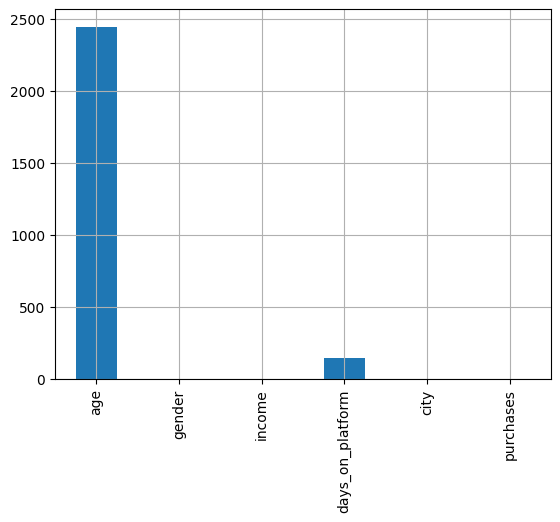

In [6]:
# let's plot the number of NaN values 
df.isna().sum().plot(kind="bar")
plt.grid()

In [7]:
# first is simply remove the missing value 
df_new = df[~df["age"].isna()]
print(df_new.shape)
df_new = df_new[~df["days_on_platform"].isna()]
df_new.shape

(2554, 6)


/var/folders/rw/s894sbjd7tx1dd507lv02bgm0000gn/T/ipykernel_1536/3463127745.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[~df["days_on_platform"].isna()]


(2476, 6)

In [8]:
df["days_on_platform"].median()

21.0

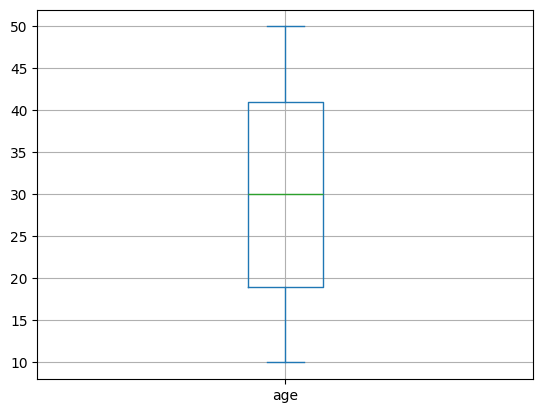

In [9]:
# instead of removing try to impute these value 
# if the distribution is gaussian than use mean if we have more outlier than use median 
# in case of the categorical value we simply impute with strings.
from sklearn.impute import SimpleImputer

df_copy = df.copy()
df_copy["age"].plot(kind="box")
plt.grid()
plt.show()


In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

age = imputer.fit_transform(df_copy[["age"]])
age

array([[30.20203602],
       [30.20203602],
       [24.        ],
       ...,
       [30.20203602],
       [30.20203602],
       [30.20203602]])

In [11]:
df_copy["age"] = pd.DataFrame(age)

In [12]:
df_copy.head()

,age,gender,income,days_on_platform,city,purchases
0,30.202036,Male,126895,14.0,San Francisco,0
1,30.202036,Male,161474,14.0,Tokyo,0
2,24.000000,Male,104723,34.0,London,1
3,29.000000,Male,43791,28.0,London,2
4,18.000000,Female,132181,26.0,London,2


In [13]:
df_copy.isna().sum()

age                   0
gender                0
income                0
days_on_platform    141
city                  0
purchases             0
dtype: int64

In [14]:
df_copy.shape

(5000, 6)

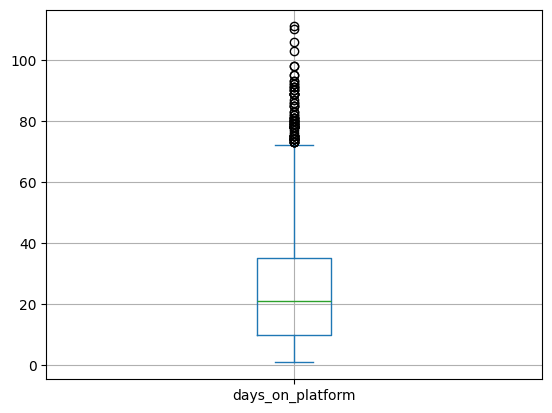

In [15]:
df_copy["days_on_platform"].plot(kind="box")
plt.grid()
plt.show()

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
days_on_platform = imputer.fit_transform(df_copy[["days_on_platform"]])

df_copy["days_on_platform"] = pd.DataFrame(days_on_platform)



In [17]:
df_copy.isna().sum()

age                 0
gender              0
income              0
days_on_platform    0
city                0
purchases           0
dtype: int64

How to handle outliers

<ul>
<li> 25 percentile - (1.5 * iqr) -> lower bound  </li>
<li>75 percentile + (1.5 * iqr) -> uper bound</li>
</ul>

In [18]:
def InterQuantileRange(data):
    percentile_25 = np.percentile(data, 25)
    percentile_75 = np.percentile(data, 75)

    IQR = percentile_75 - percentile_25 # standar formula

    lwr_bound = percentile_25 - (1.5*IQR)
    upr_bound = percentile_75 + (1.5*IQR)

    return lwr_bound, upr_bound


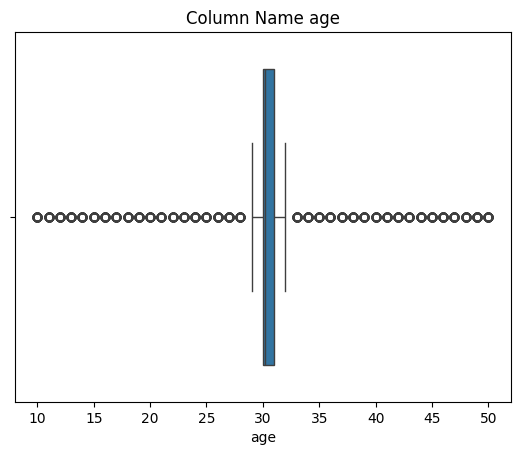

In [19]:
# check which column has outliers.

def BoxPlot(data, columname):
    sns.boxplot(x="age", data=data)
    plt.title(f"Column Name {columname}")
    plt.show()

BoxPlot(df_copy, "age")

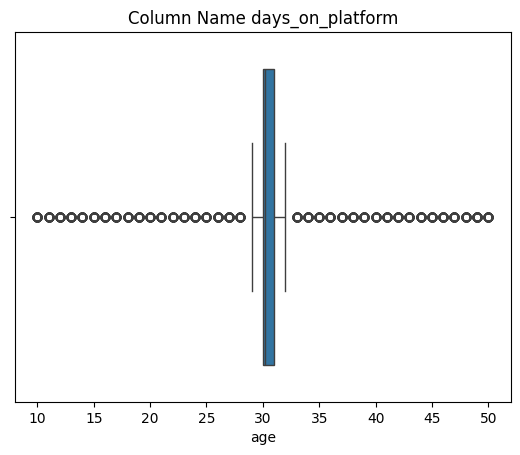

In [20]:
BoxPlot(df_copy, "days_on_platform")

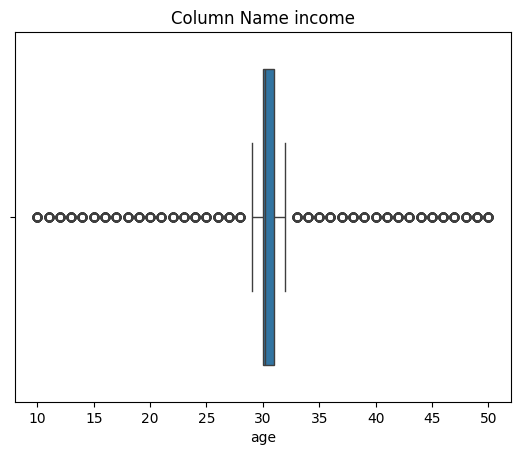

In [21]:
BoxPlot(df_copy, "income")

In [22]:
lwr_bound, upr_bound = InterQuantileRange(df_copy["age"].values)
lwr_bound, upr_bound

(28.5, 32.5)

In [23]:
df_copy.loc[df_copy["age"] < lwr_bound, "age"] = lwr_bound
df_copy.loc[df_copy["age"] > upr_bound, "age"] = upr_bound

# we can do for 
df_copy.loc[df_copy["days_on_platform"] < lwr_bound, "days_on_platform"] = lwr_bound
df_copy.loc[df_copy["days_on_platform"] > upr_bound, "days_on_platform"] = upr_bound

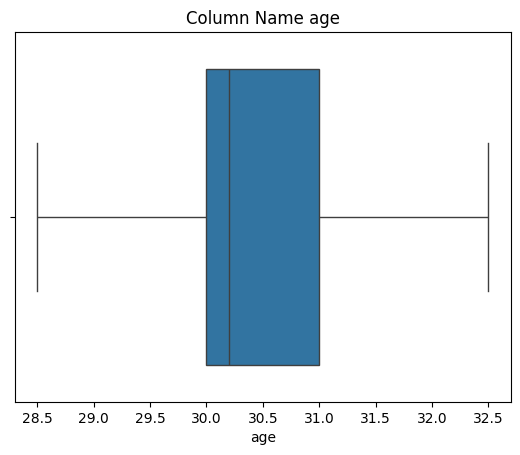

In [24]:
BoxPlot(df_copy, "age")

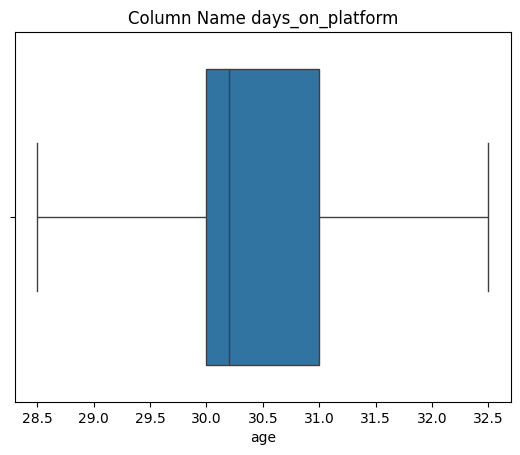

In [25]:
BoxPlot(df_copy, "days_on_platform")

Deal with text data

In [26]:
from collections import Counter
# 1. TF-IDF 
corpus = [
    "hello world how are you doing everything is ok! hello i am doing great, and everything is ok",
    "I like the movie john wick and i is want to rewatch it again!, i like movie of david",
    "You don't like the way you look, that's pretty is sad to me!, I like the way i look but i don't like the way you look"
]

d = corpus[0] # small d from overall documents
total_number_of_words = len(d.split())
all_terms = Counter(d.split())

term_frequency = dict()
for term, occur in all_terms.items():
    term_frequency[term] = occur/total_number_of_words

term_frequency # issue with term frequency is if we have words like is, the, a gonna occur more hence term frequency is gonna be more, hence
# just computing the term frequency is not enough, we need to compute the inverse document frequency

{'hello': 0.1111111111111111,
 'world': 0.05555555555555555,
 'how': 0.05555555555555555,
 'are': 0.05555555555555555,
 'you': 0.05555555555555555,
 'doing': 0.1111111111111111,
 'everything': 0.1111111111111111,
 'is': 0.1111111111111111,
 'ok!': 0.05555555555555555,
 'i': 0.05555555555555555,
 'am': 0.05555555555555555,
 'great,': 0.05555555555555555,
 'and': 0.05555555555555555,
 'ok': 0.05555555555555555}

In [27]:
# idf = log(N(number of document D)/number of document D/with term t)
tf_idf = dict()
for term, value in all_terms.items():
    term_all_docs = list(filter(lambda x: term in x , corpus)) # we check for given word in how many document it occur in total 
    idf = np.log10(len(corpus)/len(term_all_docs))# once we have the idf we can perform the tf-idf = tf*idf 
    tf_idf[term] = term_frequency[term] * idf

tf_idf

{'hello': 0.05301347274662915,
 'world': 0.026506736373314577,
 'how': 0.026506736373314577,
 'are': 0.026506736373314577,
 'you': 0.009782847725315624,
 'doing': 0.05301347274662915,
 'everything': 0.05301347274662915,
 'is': 0.0,
 'ok!': 0.026506736373314577,
 'i': 0.0,
 'am': 0.026506736373314577,
 'great,': 0.026506736373314577,
 'and': 0.009782847725315624,
 'ok': 0.009782847725315624}

We are going to use tf-idf library from sklearn to compute it

In [28]:
from sklearn.feature_extraction.text  import TfidfVectorizer

tf_idf = TfidfVectorizer()
arr = tf_idf.fit_transform(np.array(corpus)).toarray()

In [29]:
arr

array([[0.        , 0.20605592, 0.15671084, 0.20605592, 0.        ,
        0.        , 0.41211185, 0.        , 0.41211185, 0.20605592,
        0.41211185, 0.20605592, 0.2433999 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41211185, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20605592, 0.15671084],
       [0.24695029, 0.        , 0.18781206, 0.        , 0.        ,
        0.24695029, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14585282, 0.24695029, 0.24695029,
        0.37562412, 0.        , 0.        , 0.49390058, 0.24695029,
        0.        , 0.        , 0.24695029, 0.        , 0.        ,
        0.18781206, 0.18781206, 0.24695029, 0.        , 0.24695029,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.15154296,
        0.        , 0.        , 0.30308593, 0.    

Tokenizer : The idea is nothing but to split the sentence into words, or words into characters.

In [30]:
# for example given the corpus we have the idea of tokenization is to split them 
for cor in corpus:
    print(cor.split())
# we have better strategies to split these sentences, but the core idea will remain the same for all

['hello', 'world', 'how', 'are', 'you', 'doing', 'everything', 'is', 'ok!', 'hello', 'i', 'am', 'doing', 'great,', 'and', 'everything', 'is', 'ok']
['I', 'like', 'the', 'movie', 'john', 'wick', 'and', 'i', 'is', 'want', 'to', 'rewatch', 'it', 'again!,', 'i', 'like', 'movie', 'of', 'david']
['You', "don't", 'like', 'the', 'way', 'you', 'look,', "that's", 'pretty', 'is', 'sad', 'to', 'me!,', 'I', 'like', 'the', 'way', 'i', 'look', 'but', 'i', "don't", 'like', 'the', 'way', 'you', 'look']


 Bag of words 

In [31]:
unique_words = list(set(" ".join(corpus).split()))

df= pd.DataFrame(columns=["unique_words", "corpus0", "corpus1","corpus2"])

for idx, cor in enumerate(corpus):
    occurance = Counter(cor.split())
    total_match = []
    for word in unique_words:
        # i want to counter number of time this word occur in the corpus for first and second sentence
        total_match.append(occurance[word])
    
    df[f"corpus{idx}"]=total_match

df["unique_words"] = unique_words

In [32]:
# BOW
df[["corpus0", "corpus1", "corpus2"]].values.T


array([[0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 1, 0]])

In [33]:
# using sklearn library to compute the BOW 
from sklearn.feature_extraction.text import CountVectorizer

bagofwords = CountVectorizer(ngram_range=(1,1))
bagofwords.fit_transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1,
        0, 1, 1, 3, 1, 0, 3, 0, 0, 3]])

In [34]:
bagofwords.get_feature_names_out()

array(['again', 'am', 'and', 'are', 'but', 'david', 'doing', 'don',
       'everything', 'great', 'hello', 'how', 'is', 'it', 'john', 'like',
       'look', 'me', 'movie', 'of', 'ok', 'pretty', 'rewatch', 'sad',
       'that', 'the', 'to', 'want', 'way', 'wick', 'world', 'you'],
      dtype=object)

Vocabulary Construction concept of padding, truncation.

In [35]:
import pandas as pd 
import numpy as np

In [36]:
df = pd.read_csv("spam.csv", encoding="latin1")
df.drop(columns=["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [37]:
from collections import Counter
term_frequency = []
for idx, rows in df.iterrows():
    d =rows["v2"]
    total_number_of_words = len(d.split()) # total number of words 
    word_frequency = Counter(d.split()) # word frequency
    term_frequency.append({key: value/total_number_of_words for key, value in word_frequency.items()})

idf = []
total_number_of_rows = df.shape[0]

for freq in term_frequency:
    idf_dict = dict()
    for key, value in freq.items():
        word_present_in_total_corpus = list(filter(lambda x: key in x, df["v2"].values.tolist()))
        idf_dict[key] = np.log10(total_number_of_words/len(word_present_in_total_corpus))

    idf.append(idf_dict)


In [38]:
assert len(idf)  == len(term_frequency)

In [39]:

tf_idf = []
for term_freq,idf_freq in zip(term_frequency, idf):
    tf_idf.append([value * idf_freq.get(key) for key, value in term_freq.items()]) # list comprehension

In [40]:
# concept of padding and trunction 
vocabulary = list(set(" ".join(df["v2"].values.tolist()).split()))[:500]
vocabulary_size = len(vocabulary)


In [41]:
for i in range(len(tf_idf)):
    if len(tf_idf[i]) > vocabulary_size:
        # it need to be truncated
        tf_idf[i]  =tf_idf[i][:vocabulary_size]
    elif len(tf_idf[i]) < vocabulary_size:
        # padding 
        padding_span = vocabulary_size - len(tf_idf[i])
        tf_idf[i] = tf_idf[i] + [0]*padding_span


In [42]:
tf_idf = np.array(tf_idf)

In [43]:
tf_idf.shape

(5572, 500)

# Remove Punctuation. Remove Stopwords, Remove digits, Remove links etc.

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer,
stop_words = list(set(stopwords.words("english")))


SyntaxError: trailing comma not allowed without surrounding parentheses (1317589095.py, line 3)

In [ ]:
import string 

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stemmer = PorterStemmer()

In [ ]:
import re 
import string 
def preprocessing(data):
    # links  removed
    data = re.sub(r"http\S+", "", data)
    data = re.sub(r"www\S+","", data)
    data = re.sub(r"\d+", "", data)
    data = re.sub(r'[^\x00-\x7F]+',' ', data)
    # punctuation remove
    data = data.translate(str.maketrans( '', '',string.punctuation))

    # take only those words for which len is more than 2
    data = " ".join(list(filter(lambda x: len(x) > 2, data.split())))

    data = " ".join(list(map(lambda x: stemmer.stem(x), data.split())))
    
    data_without_stopwords = list(filter(lambda x: x not in stop_words, data.split()))
    data = " ".join(data_without_stopwords).lower()
    # stemming 
    return data


df["filtered_v2"] = df["v2"].apply(preprocessing)


In [ ]:
len(set(" ".join(df["filtered_v2"].values.tolist()).split()))

6773

### Word to do 
1. Take the dataset and apply all the sufficient preprocessing. 
2. plot the world cloud to show the most occuring words, Plot the bar chart for top 10 most occuring words in whole Document(D).
3. Proceed towards applying two different algorithm
  * TF-idf -- take care of padding and truncation.
  * BOW - take care of padding and truncation.
4. Convert them to array make sure to use vocabulary size as max size. 
5. Try to put Markdown to explain.

6. complete the whole pipeline for training and testing. 

# Completing the rest of data construction

In [59]:
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose", "Austin", "Jacksonville", "San Francisco", "Indianapolis", "Columbus", "Fort Worth", "Charlotte", "Seattle", "Denver", "Washington"]


In [82]:
import random
random_sample_cities = random.sample(cities, 20)

In [85]:
columsn_without_city = list(filter(lambda x: "city" not in x,  df_copy.columns.tolist()))

In [95]:
df_new_cities = pd.DataFrame(data=random_sample_cities, columns=["city"])

for col in columsn_without_city:
    df_new_cities[col] = "None"

In [96]:
df_new_cities

,city,age,gender,income,days_on_platform,purchases
0,Denver,None,None,None,None,None
1,Washington,None,None,None,None,None
2,San Diego,None,None,None,None,None
3,Los Angeles,None,None,None,None,None
4,Austin,None,None,None,None,None
5,Dallas,None,None,None,None,None
6,San Antonio,None,None,None,None,None
7,Jacksonville,None,None,None,None,None
8,Columbus,None,None,None,None,None
9,Houston,None,None,None,None,None


In [104]:
df_copy_2 = pd.concat([df_copy, df_new_cities], axis=0)

In [108]:
vocab_city = dict()
dd = df_copy_2["city"].value_counts()/df_copy_2.shape[0]
for val in dd.items():
    vocab_city[val[0]] = val[1]
df_copy_2["city"] = df_copy_2["city"].apply(lambda x: vocab_city.get(x))


In [93]:
df_copy_2.value_counts()

Series([], Name: count, dtype: int64)

In [132]:
temp_df = df_copy["city"].value_counts()/df_copy.shape[0]

vocab_city = dict()

for rows in temp_df.items():
    vocab_city[rows[0]] = rows[1]

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
vocab = {"male": 0, "female":1}

In [49]:
df_copy["gender"]  = df_copy["gender"].apply(lambda x: vocab[x.lower()])

In [135]:
df_copy["city"] = df_copy["city"].apply(lambda x: vocab_city.get(x))


In [145]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
minmaxscaler = MinMaxScaler()
standarscaler = StandardScaler()

df_1 = pd.DataFrame(minmaxscaler.fit_transform(df_copy.values), columns=df_copy.columns)
df_2 = pd.DataFrame(standarscaler.fit_transform(df_copy.values), columns=df_copy.columns)

# Corss validation
* Splitting wih train_test_split

In [152]:
X = df_1.drop("gender", axis=1)
Y = df_1["gender"]

In [157]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY =  train_test_split(X, Y, test_size=0.3, random_state=42)


* K Fold cross validation

In [164]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

for train_idx, test_idx in kfold.split(df_1):
    print(df_1.iloc[train_idx].shape)
    print(df_1.iloc[test_idx].shape)


(4000, 6)
(1000, 6)
(4000, 6)
(1000, 6)
(4000, 6)
(1000, 6)
(4000, 6)
(1000, 6)
(4000, 6)
(1000, 6)
